In [1]:
import os
import copy
import json
import numpy as np
import pandas as pd
import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt
from datetime import datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, Select
from IPython.display import display, display_markdown, HTML

In [2]:
# Define init variable
INPUT_DATA_FN = "output_result.json"


In [3]:
# Result data handling

## load result data file
input_data_fp = os.path.join(os.getcwd(), INPUT_DATA_FN)
with open(input_data_fp) as read_fh:
    full_result_obj = json.load(read_fh)

# get preference name list
preference_name_list = full_result_obj.keys()
    

In [4]:
items_layout = Layout(width='auto')
items_style = {'description_width': 'initial'}
c_slider = Dropdown(layout=items_layout, style=items_style, options=["default"])
d_select = Dropdown(options=preference_name_list, layout=items_layout, style=items_style)


def update_c_range(*args):
    c_slider.options = full_result_obj[d_select.value].keys()

def view3(preference_name='',preference_value=''):
    DATA_LIST = 'time_list'
    DATA_NAME = 'run_time'
    DELETE_KEY = "video-recording-fps"
    HIDE_MISSING_CASE = False
    layout_row = 1
    layout_column = 1
    fig_size_w = 10
    fig_size_h = 5
    matplotlib.rcParams.update({'figure.max_open_warning': 0})

    data_dict = copy.deepcopy(full_result_obj[preference_name])
    for p_value in data_dict:
        if DELETE_KEY in data_dict[p_value]:
            data_dict[p_value].pop(DELETE_KEY)
    #
    # generate merged data
    #
    casename_list = list(set([casename for lable, data in data_dict.items() for casename in data.keys()]))

    case_result = []
    for casename in casename_list:
        result = {
            "casename": casename,
            "result": {}
        }
        for lable, data in data_dict.items():
            result["result"][lable] = {}

        for lable, data in data_dict.items():
            if data.get(casename):
                result["result"][lable][DATA_LIST] = data.get(casename).get(DATA_LIST)
            else:
                result["result"][lable][DATA_LIST] = []
        case_result.append(result)

    #
    # show original data of each cases
    #
    display_markdown('## Merged Result', raw=True)
    display_markdown('Report Generate Time: {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')), raw=True)
    display_markdown('{} Cases'.format(len(case_result)), raw=True)
    nightly_better_list = []
    for case in sorted(case_result):
        casename = case.get('casename')
        result = case.get('result')
        d = pd.DataFrame(result)

        # drop empty 'DATA_LIST'
        for c in d:
            if (d[c][DATA_LIST] == []) :
                d.drop(c, axis=1, inplace=True)

        # Retrive the value of 'DATA_NAME' from each run
        value = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME] for c in d]).T
        value.columns = d.columns

        # Plot input latency boxplot
        value_min = min(value.min())
        value_max = max(value.max())
        value_median = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME].median() for c in d]).T
        value_median.columns = d.columns

        # When HIDE_MISSING_CASE is enabled, skip the case if the case data less then input data amount.
        if HIDE_MISSING_CASE and len(INPUT_SOURCE) > len(value.T):
            # display summary
            display_markdown('### {}\nskip draw plot box'.format(casename), raw=True)
            display(value.describe())
        else:

            fig, ax = plt.subplots()
            ax.plot(list(range(1,len(list(value_median.median()))+1)), list(value_median.median()), "r:")

            value.plot.box(layout=(layout_row, layout_column),
                           sharey=True, sharex=True, figsize=(fig_size_w, fig_size_h),
                           ylim=(0, value_max*1.1), ax=ax)
            plt.title(casename)
            # display summary
            display_markdown('### {}'.format(casename), raw=True)
            display(value.describe())
    # show plot
    plt.show()
    


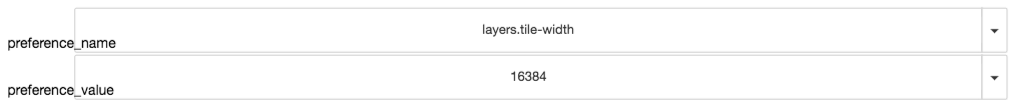

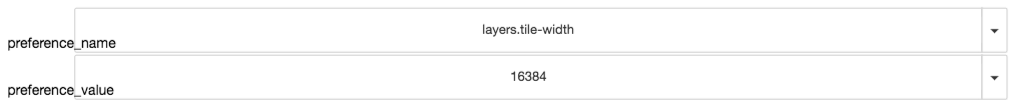

## Merged Result

Report Generate Time: 2017-11-06 16:45:42

30 Cases

### test_firefox_amazon_ail_hover_related_product_thumbnail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,486.666667,475.555556,445.555556
std,11.475506,25.552872,24.258552
min,466.666667,411.111111,411.111111
25%,477.777778,469.444444,433.333333
50%,488.888889,477.777778,444.444444
75%,497.222222,488.888889,466.666667
max,500.000000,500.000000,477.777778


### test_firefox_amazon_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,7.777778,8.888889,7.222222
std,5.367177,7.027284,5.270463
min,5.555556,5.555556,5.555556
25%,5.555556,5.555556,5.555556
50%,5.555556,5.555556,5.555556
75%,5.555556,5.555556,5.555556
max,22.222222,22.222222,22.222222


### test_firefox_amazon_ail_type_in_search_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,18.333333,16.111111,17.777778
std,6.441677,6.651217,7.768954
min,5.555556,5.555556,11.111111
25%,13.888889,11.111111,11.111111
50%,22.222222,16.666667,16.666667
75%,22.222222,22.222222,22.222222
max,22.222222,22.222222,33.333333


### test_firefox_facebook_ail_click_close_chat_tab

,16384,2,default
count,10.000000,10.000000,10.000000
mean,40.000000,46.666667,63.333333
std,14.998857,15.537909,5.367177
min,11.111111,22.222222,55.555556
25%,33.333333,33.333333,58.333333
50%,44.444444,50.000000,66.666667
75%,52.777778,55.555556,66.666667
max,55.555556,66.666667,66.666667


### test_firefox_facebook_ail_click_open_chat_tab

,16384,2,default
count,10.000000,10.000000,10.000000
mean,185.555556,245.555556,253.333333
std,65.010287,80.371224,13.658584
min,133.333333,144.444444,233.333333
25%,147.222222,155.555556,244.444444
50%,161.111111,300.000000,255.555556
75%,175.000000,300.000000,266.666667
max,322.222222,322.222222,266.666667


### test_firefox_facebook_ail_click_open_chat_tab_emoji

,16384,2,default
count,10.000000,10.000000,10.000000
mean,54.444444,66.666667,72.222222
std,12.227833,11.712139,13.094570
min,33.333333,44.444444,55.555556
25%,44.444444,66.666667,66.666667
50%,55.555556,66.666667,66.666667
75%,66.666667,66.666667,75.000000
max,66.666667,88.888889,100.000000


### test_firefox_facebook_ail_click_photo_viewer_right_arrow

,16384,2,default
count,10.000000,10.000000,10.000000
mean,86.666667,91.111111,83.333333
std,12.614360,12.614360,5.856070
min,66.666667,66.666667,77.777778
25%,77.777778,80.555556,77.777778
50%,83.333333,100.000000,83.333333
75%,100.000000,100.000000,88.888889
max,100.000000,100.000000,88.888889


### test_firefox_facebook_ail_scroll_home_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,43.333333,42.222222,50.000000
std,8.198498,11.475506,9.442629
min,33.333333,33.333333,33.333333
25%,36.111111,33.333333,44.444444
50%,44.444444,33.333333,50.000000
75%,44.444444,55.555556,55.555556
max,55.555556,55.555556,66.666667


### test_firefox_facebook_ail_type_comment_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,36.666667,25.555556,37.777778
std,7.499428,10.540926,9.369712
min,33.333333,11.111111,33.333333
25%,33.333333,13.888889,33.333333
50%,33.333333,33.333333,33.333333
75%,33.333333,33.333333,33.333333
max,55.555556,33.333333,55.555556


### test_firefox_facebook_ail_type_composerbox_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,32.222222,37.777778,22.222222
std,17.723683,14.054567,12.559870
min,11.111111,11.111111,5.555556
25%,22.222222,33.333333,11.111111
50%,22.222222,33.333333,27.777778
75%,41.666667,50.000000,33.333333
max,66.666667,55.555556,33.333333


### test_firefox_facebook_ail_type_message_1_txt

,16384,2,default
count,10.000000,10.000000,10.000000
mean,22.777778,16.666667,21.111111
std,24.630326,11.415581,9.369712
min,5.555556,5.555556,5.555556
25%,11.111111,5.555556,22.222222
50%,11.111111,16.666667,22.222222
75%,22.222222,22.222222,22.222222
max,88.888889,33.333333,33.333333


### test_firefox_gdoc_ail_pagedown_10_text

,16384,2,default
count,10.000000,10.000000,10.000000
mean,37.777778,40.000000,42.222222
std,7.768954,14.054567,10.210406
min,33.333333,11.111111,33.333333
25%,33.333333,33.333333,33.333333
50%,33.333333,38.888889,38.888889
75%,41.666667,52.777778,52.777778
max,55.555556,55.555556,55.555556


### test_firefox_gdoc_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,68.888889,63.333333,63.333333
std,7.027284,7.499428,10.540926
min,66.666667,44.444444,55.555556
25%,66.666667,66.666667,55.555556
50%,66.666667,66.666667,61.111111
75%,66.666667,66.666667,66.666667
max,88.888889,66.666667,88.888889


### test_firefox_gmail_ail_compose_new_mail_via_keyboard

,16384,2,default
count,10.000000,10.000000,10.000000
mean,212.222222,206.666667,194.444444
std,14.296488,18.294947,12.001372
min,200.000000,188.888889,177.777778
25%,200.000000,200.000000,183.333333
50%,205.555556,200.000000,200.000000
75%,222.222222,208.333333,200.000000
max,233.333333,244.444444,211.111111


### test_firefox_gmail_ail_open_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,232.222222,216.666667,226.666667
std,39.003359,49.204927,108.512830
min,200.000000,177.777778,177.777778
25%,211.111111,191.666667,180.555556
50%,216.666667,200.000000,194.444444
75%,233.333333,219.444444,208.333333
max,333.333333,344.444444,533.333333


### test_firefox_gmail_ail_reply_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,236.666667,250.000000,228.888889
std,11.770555,15.044516,14.998857
min,211.111111,233.333333,211.111111
25%,233.333333,236.111111,213.888889
50%,233.333333,250.000000,233.333333
75%,244.444444,255.555556,233.333333
max,255.555556,277.777778,255.555556


### test_firefox_gmail_ail_type_in_reply_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,15.000000,18.333333,17.777778
std,6.441677,12.015651,5.737753
min,5.555556,5.555556,11.111111
25%,11.111111,6.944444,11.111111
50%,11.111111,16.666667,22.222222
75%,22.222222,30.555556,22.222222
max,22.222222,33.333333,22.222222


### test_firefox_gsearch_ail_select_image_cat

,16384,2,default
count,10.000000,10.000000,10.000000
mean,103.333333,106.666667,98.888889
std,61.764187,76.119897,86.772648
min,77.777778,66.666667,66.666667
25%,77.777778,77.777778,66.666667
50%,83.333333,88.888889,66.666667
75%,88.888889,88.888889,83.333333
max,277.777778,322.222222,344.444444


### test_firefox_gsearch_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,19.444444,26.111111,14.444444
std,9.532991,10.492011,8.764563
min,5.555556,5.555556,5.555556
25%,11.111111,22.222222,11.111111
50%,22.222222,33.333333,11.111111
75%,22.222222,33.333333,19.444444
max,33.333333,33.333333,33.333333


### test_firefox_gsearch_ail_type_searchbox

,16384,2,default
count,10.000000,10.000000,1.000000e+01
mean,6.666667,6.111111,5.555556e+00
std,2.342428,1.756821,9.362223e-16
min,5.555556,5.555556,5.555556e+00
25%,5.555556,5.555556,5.555556e+00
50%,5.555556,5.555556,5.555556e+00
75%,5.555556,5.555556,5.555556e+00
max,11.111111,11.111111,5.555556e+00


### test_firefox_gsheet_ail_clicktab_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,1005.555556,1050.000000,944.444444
std,46.921702,341.273738,382.038428
min,944.444444,400.000000,144.444444
25%,969.444444,941.666667,1088.888889
50%,994.444444,977.777778,1100.000000
75%,1033.333333,1191.666667,1122.222222
max,1100.000000,1622.222222,1233.333333


### test_firefox_gsheet_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,43.333333,47.777778,41.111111
std,15.225781,14.861039,13.907395
min,33.333333,33.333333,33.333333
25%,33.333333,36.111111,33.333333
50%,33.333333,44.444444,33.333333
75%,52.777778,52.777778,41.666667
max,77.777778,77.777778,66.666667


### test_firefox_gslide_ail_pagedown_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,334.444444,278.888889,322.222222
std,11.049210,16.932044,10.475656
min,311.111111,266.666667,300.000000
25%,333.333333,266.666667,322.222222
50%,333.333333,277.777778,322.222222
75%,333.333333,277.777778,330.555556
max,355.555556,322.222222,333.333333


### test_firefox_gslide_ail_type_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,101.111111,100.000000,93.333333
std,3.513642,7.407407,11.944086
min,100.000000,88.888889,77.777778
25%,100.000000,100.000000,88.888889
50%,100.000000,100.000000,88.888889
75%,100.000000,100.000000,97.222222
max,111.111111,111.111111,122.222222


### test_firefox_outlook_ail_composemail_0

,16384,2,default
count,10.000000,10.000000,10.000000
mean,415.555556,401.111111,398.888889
std,87.989275,40.723902,17.723683
min,355.555556,366.666667,377.777778
25%,366.666667,380.555556,388.888889
50%,394.444444,388.888889,400.000000
75%,411.111111,400.000000,400.000000
max,655.555556,511.111111,433.333333


### test_firefox_outlook_ail_type_composemail_0

,16384,2
count,10.000000,10.000000
mean,128.333333,25.000000
std,228.288347,11.490439
min,5.555556,5.555556
25%,13.888889,22.222222
50%,22.222222,22.222222
75%,33.333333,33.333333
max,566.666667,44.444444


### test_firefox_ymail_ail_compose_new_mail

,16384,2,default
count,10.000000,10.000000,10.000000
mean,295.555556,367.777778,290.000000
std,20.420813,281.015696,21.243897
min,277.777778,266.666667,266.666667
25%,277.777778,266.666667,269.444444
50%,288.888889,277.777778,294.444444
75%,308.333333,297.222222,300.000000
max,333.333333,1166.666667,333.333333


### test_firefox_ymail_ail_type_in_reply_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,25.555556,18.333333,16.111111
std,29.068766,8.302412,22.748400
min,5.555556,5.555556,5.555556
25%,11.111111,11.111111,5.555556
50%,11.111111,22.222222,5.555556
75%,30.555556,22.222222,18.055556
max,100.000000,33.333333,77.777778


### test_firefox_youtube_ail_select_search_suggestion

,16384,2,default
count,10.000000,10.000000,10.000000
mean,13.888889,12.222222,11.111111
std,9.166199,8.996265,8.281733
min,5.555556,5.555556,5.555556
25%,6.944444,5.555556,5.555556
50%,11.111111,11.111111,11.111111
75%,19.444444,11.111111,11.111111
max,33.333333,33.333333,33.333333


### test_firefox_youtube_ail_type_in_search_field

,16384,2,default
count,10.000000,10.000000,10.000000
mean,9.444444,17.777778,13.888889
std,6.953698,8.996265,10.227186
min,5.555556,5.555556,5.555556
25%,5.555556,11.111111,5.555556
50%,5.555556,22.222222,8.333333
75%,9.722222,22.222222,22.222222
max,22.222222,33.333333,33.333333


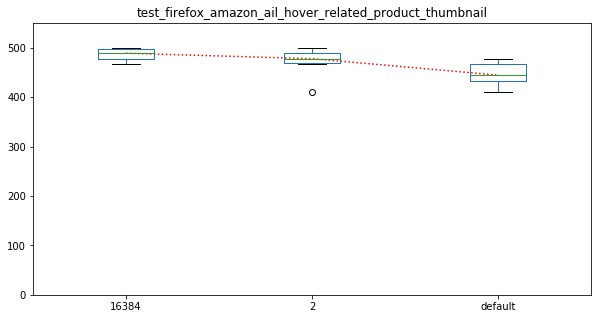

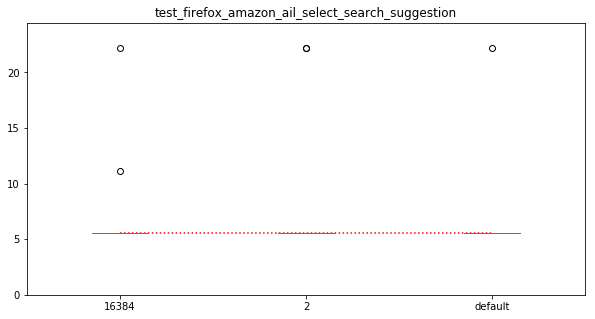

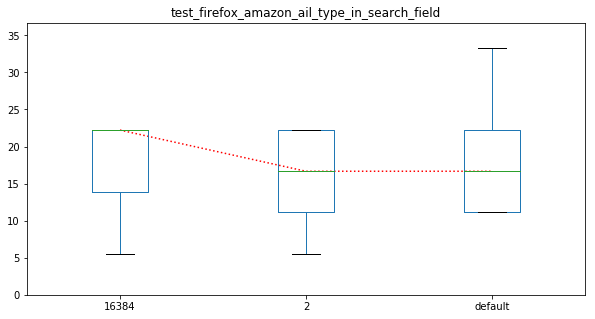

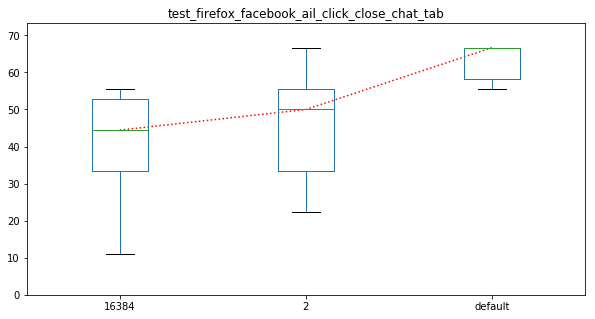

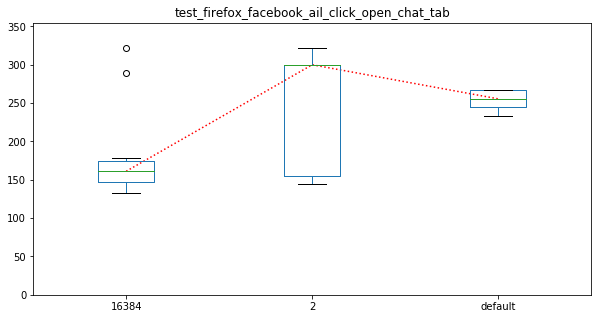

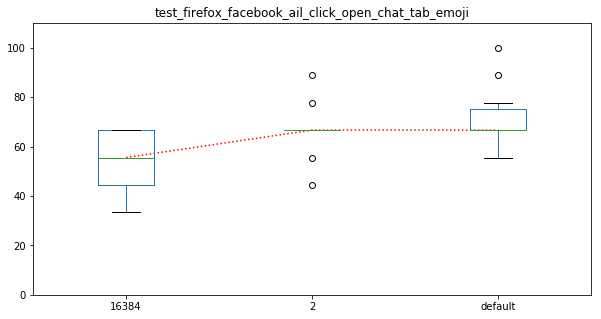

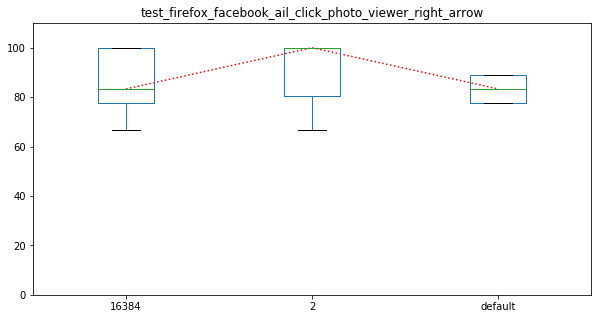

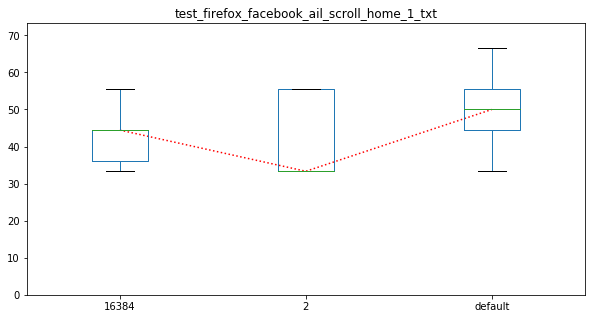

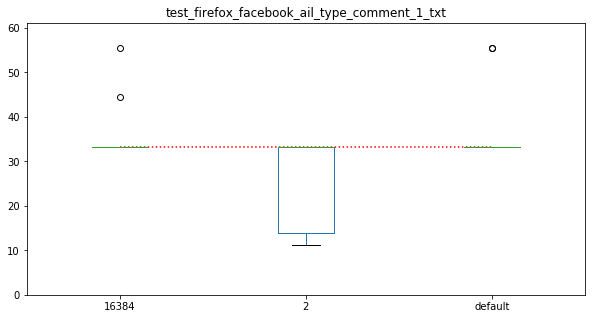

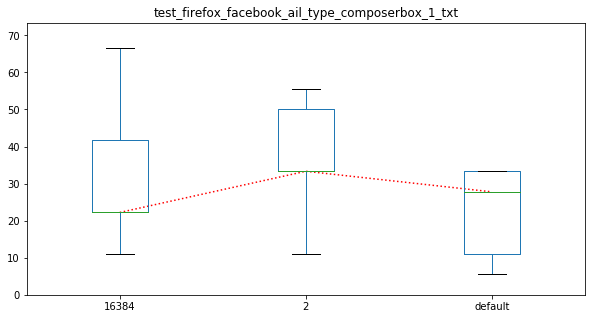

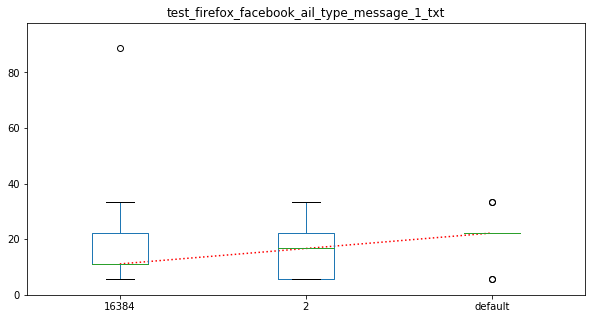

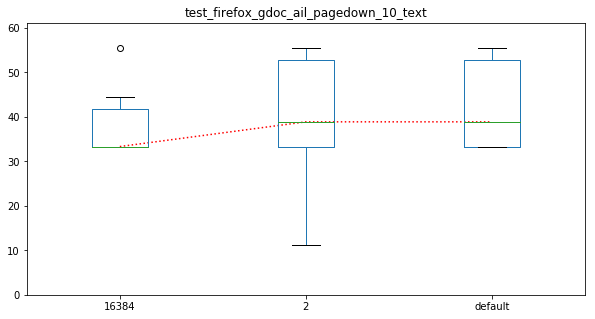

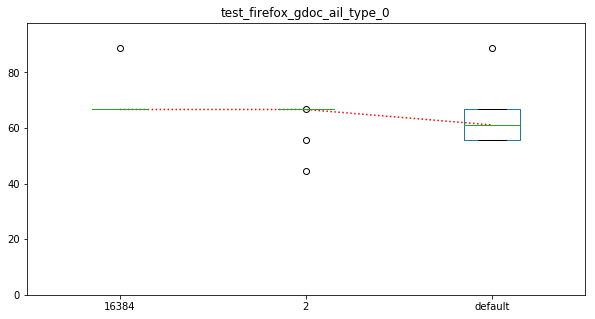

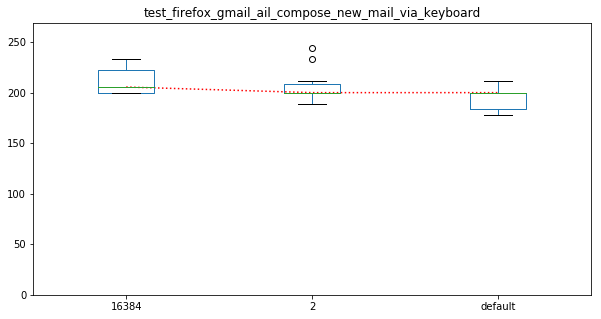

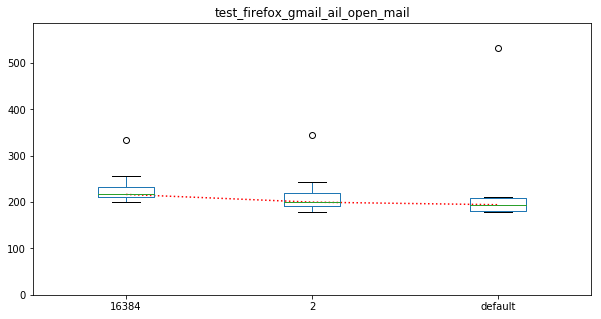

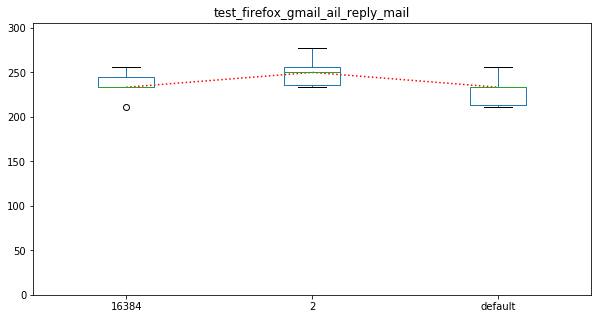

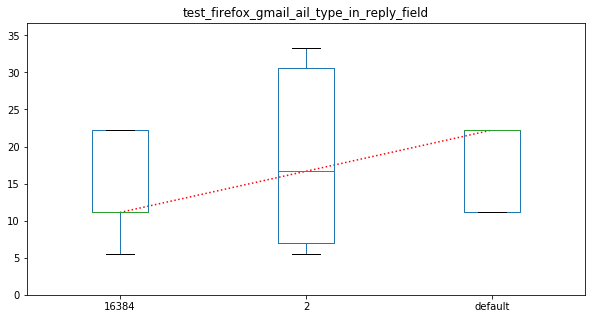

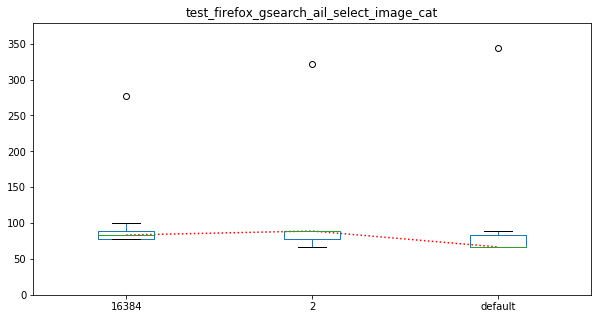

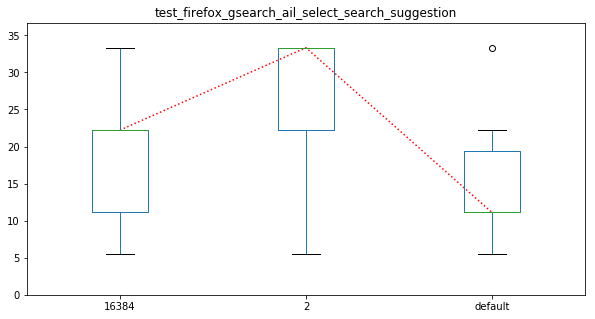

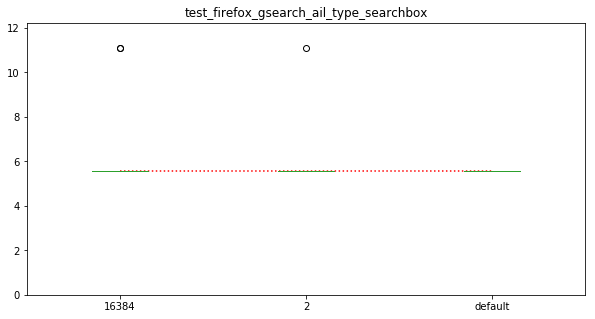

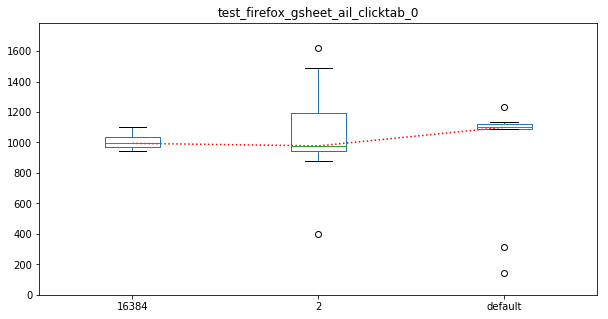

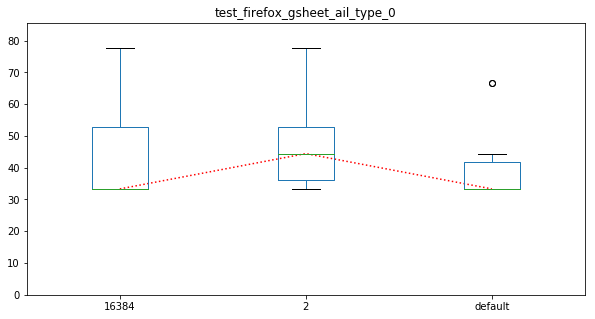

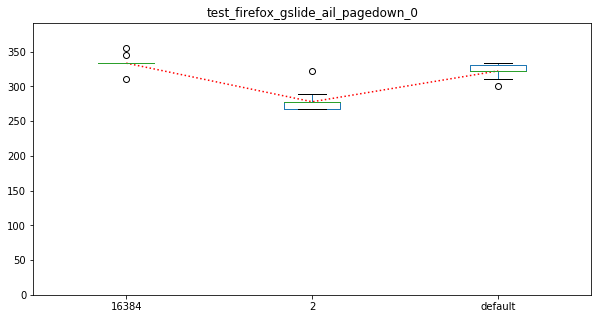

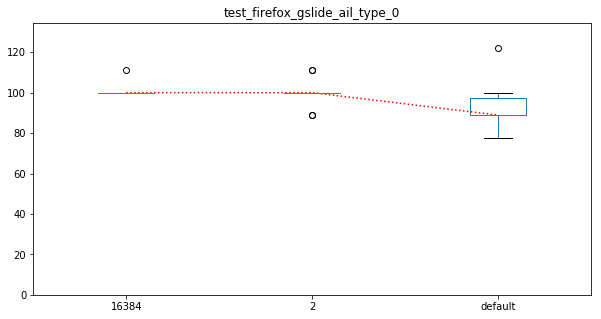

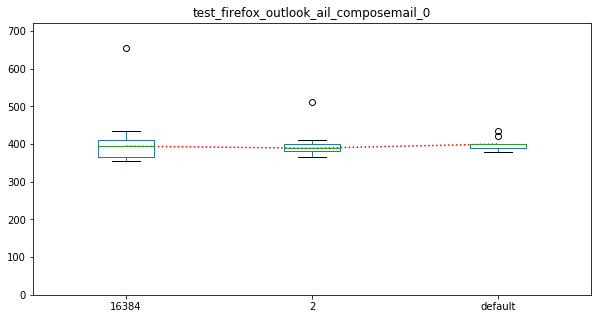

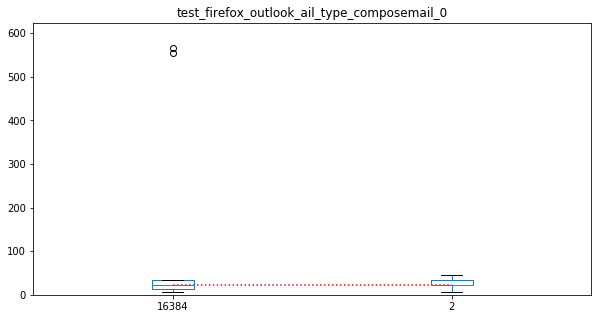

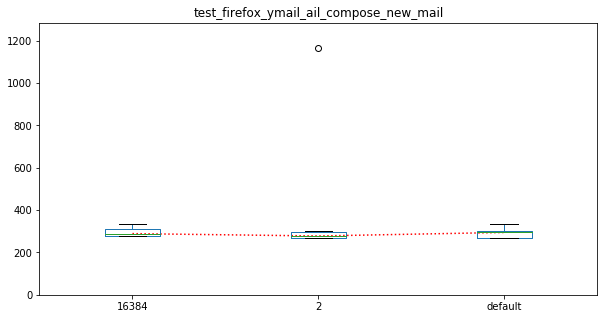

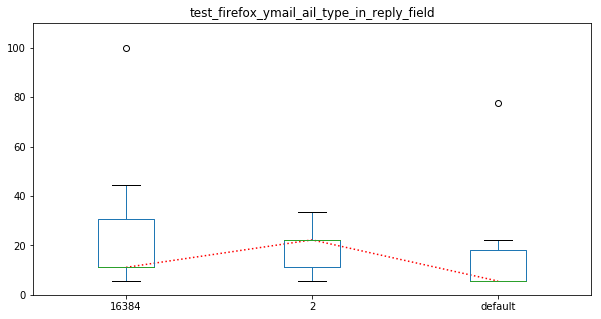

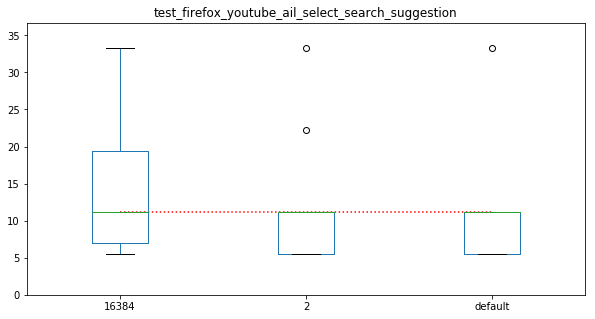

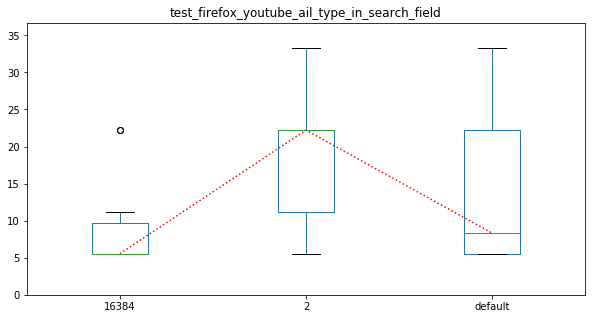

In [5]:
d_select.observe(update_c_range, 'value')
interactive_obj = interactive(view3, preference_value=c_slider,preference_name=d_select)
interactive_obj

